<a href="https://colab.research.google.com/github/Osakhra/ITAI2373-NewsBot-Final/blob/main/notebooks/01_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langdetect spacy nltk scikit-learn pyldavis textblob transformers torch sumy sentence-transformers numpy matplotlib seaborn googletrans==4.0.0-rc1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 34.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of gensim to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.5 

In [6]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Install git if needed (most Colab environments have it)
!git --version

# Clone your GitHub repo (replace with your actual repo URL)
!git clone https://github.com/Osakhra/ITAI2373-NewsBot-Final.git

# Add your src folder to Python's path so you can import your modules
import sys
sys.path.append('/content/ITAI2373-NewsBot-Final/src')


git version 2.34.1
Cloning into 'ITAI2373-NewsBot-Final'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 194 (delta 11), reused 6 (delta 6), pack-reused 170 (from 1)
Receiving objects: 100% (194/194), 62.95 KiB | 10.49 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [7]:
# List what’s inside your src folder to confirm structure
import os
print(os.listdir('/content/ITAI2373-NewsBot-Final/src'))

# Now, try importing your first module!
from data_processing.text_preprocessor import TextPreprocessor

# Instantiate and test
pre = TextPreprocessor()
print("TextPreprocessor imported and ready!")


['analysis', 'language_models', 'conversation', '.keep', 'multilingual', 'data_processing', 'utils']
TextPreprocessor imported and ready!


In [8]:
from google.colab import files
uploaded = files.upload()


Saving BBC News Train.csv to BBC News Train.csv


In [24]:
import pandas as pd

df = pd.read_csv('BBC News Train.csv')
df = df.rename(columns={'Text': 'content', 'Category': 'category'})



In [10]:
df['clean_content'] = df['content'].apply(pre.preprocess)
df[['content', 'clean_content']].head()


,content,clean_content
0,worldcom ex-boss launches defence lawyers defe...,worldcom ex boss launch defence lawyer defend ...
1,german business confidence slides german busin...,german business confidence slide german busine...
2,bbc poll indicates economic gloom citizens in ...,bbc poll indicate economic gloom citizen major...
3,lifestyle governs mobile choice faster bett...,lifestyle govern mobile choice fast well funky...
4,enron bosses in $168m payout eighteen former e...,enron boss payout eighteen former enron direct...


In [22]:
from data_processing.data_validator import DataValidator

# (Assuming you've loaded your data and renamed columns already)
validator = DataValidator(required_columns=['content', 'category'])
if validator.validate(df):
    print("✅ Data validation passed! Your data is ready for modeling.")


✅ Data validation passed! Your data is ready for modeling.


---
**Data validation is complete.**

Proceed to [02_Advanced_Classification.ipynb](02_Advanced_Classification.ipynb) for text preprocessing, feature extraction, and model training.
---


The following is a continuation only for me to grasp what I am doing. Ignore and move on to 02.

In [14]:
X = extractor.fit_transform(df['clean_content'])
print("TF-IDF matrix shape:", X.shape)

feature_names = extractor.get_feature_names()
print("Sample features:", feature_names[:20])


TF-IDF matrix shape: (1490, 2000)
Sample features: ['ability' 'able' 'absolutely' 'abuse' 'academy' 'academy award' 'accept'
 'access' 'accord' 'account' 'accounting' 'accuse' 'achieve' 'achievement'
 'across' 'act' 'action' 'activity' 'actor' 'actress']


In [15]:
y = df['category']
print("Categories:", y.unique())


Categories: ['business' 'tech' 'politics' 'sport' 'entertainment']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (1192, 2000)
Test set size: (298, 2000)


In [17]:
from analysis.classifier import NewsClassifier

clf = NewsClassifier(model_type='nb')  # 'nb' for Naive Bayes; try 'logreg' for Logistic Regression
clf.train(X_train, y_train)
print("Classifier trained.")


Classifier trained.


In [25]:
clf.evaluate(X_test, y_test)


               precision    recall  f1-score   support

     business       0.97      0.97      0.97        75
entertainment       1.00      0.98      0.99        46
     politics       0.93      0.95      0.94        56
        sport       0.97      1.00      0.98        63
         tech       0.96      0.93      0.95        58

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298

Accuracy: 96.64%


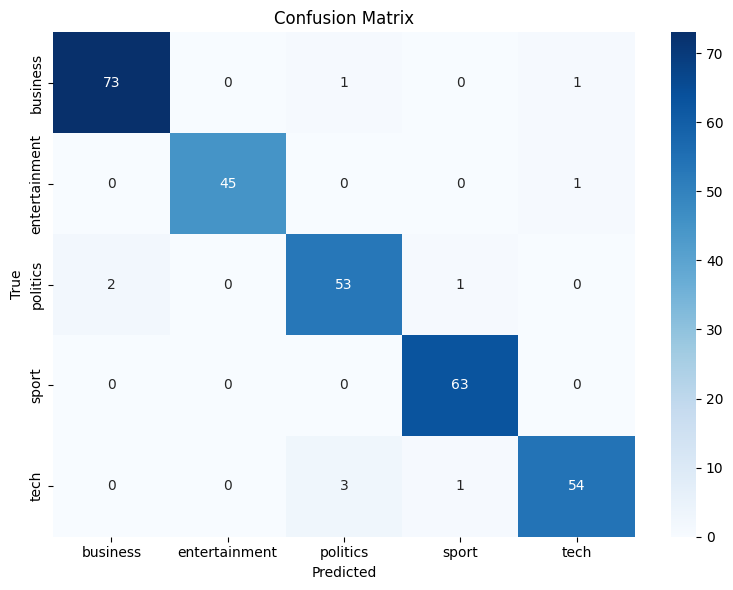

In [19]:
from utils.evaluation import plot_confusion_matrix
labels = sorted(y.unique())
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels=labels)


In [20]:
clf_lr = NewsClassifier(model_type='logreg')
clf_lr.train(X_train, y_train)
print("Logistic Regression Classifier trained.")
clf_lr.evaluate(X_test, y_test)


Logistic Regression Classifier trained.
               precision    recall  f1-score   support

     business       0.96      0.97      0.97        75
entertainment       0.96      0.98      0.97        46
     politics       0.95      0.93      0.94        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.93      0.96        58

     accuracy                           0.96       298
    macro avg       0.96      0.96      0.96       298
 weighted avg       0.96      0.96      0.96       298

Accuracy: 96.31%


In [21]:
clf.save('news_classifier_nb.pkl')
